# Identifying and Understanding Groups, Building Models from Data

Objective:

To analyze a dataset, identify groups/clusters within the data, and build a machine learning model.

Dataset: Use the Iris dataset or any customer segmentation dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Steps:

Load the Data: Import the dataset using Pandas.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Preprocess the Data: Handle missing values, check data types, and normalize numerical values.

In [ ]:
df.dropna(inplace=True)
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
if 'Gender' in df.columns:
    label_encoder = LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Converts Male/Female to 0/1

# Normalize numerical values
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Display dataset after preprocessing
print(df.head())

   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1 -1.424569           -1.738999               -0.434801   
1           2       1 -1.281035           -1.738999                1.195704   
2           3       0 -1.352802           -1.700830               -1.715913   
3           4       0 -1.137502           -1.700830                1.040418   
4           5       0 -0.563369           -1.662660               -0.395980   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [ ]:
print(df['Cluster'].value_counts())  # Shows count of each cluster

Cluster
2    123
1     39
0     38
Name: count, dtype: int64


Perform EDA:

Visualize data distributions using histograms and boxplots.

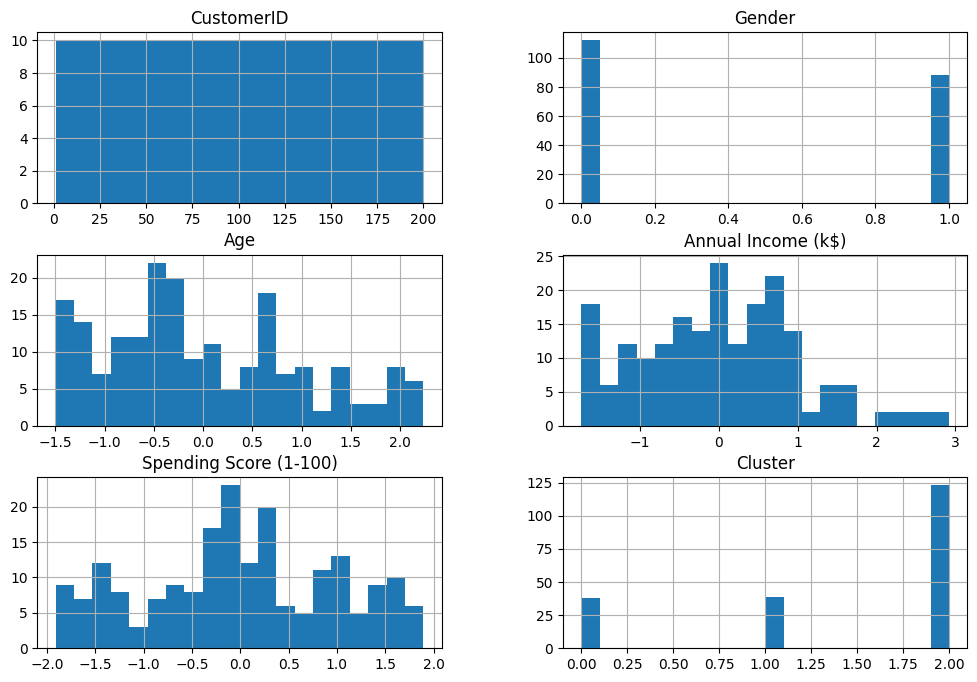

In [ ]:
df.hist(figsize=(12, 8), bins=20)
plt.show()

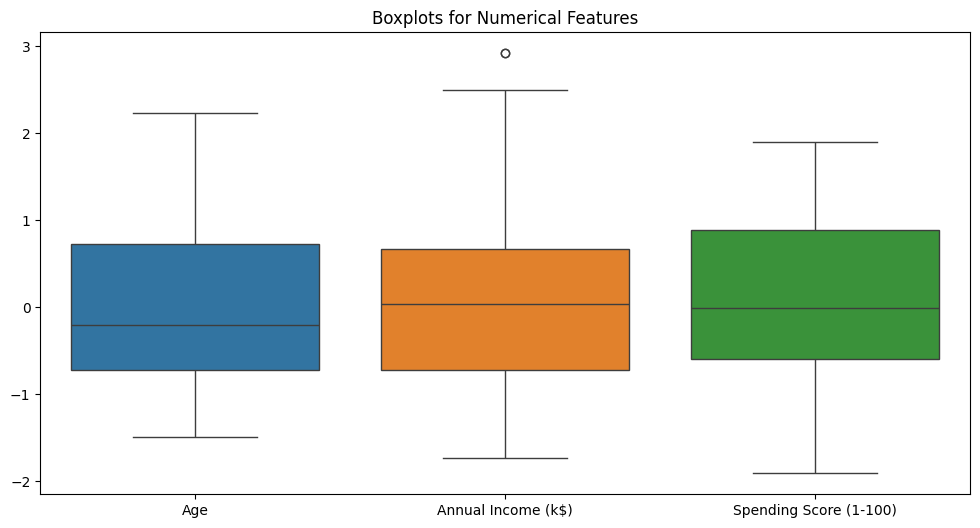

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Boxplots for Numerical Features")
plt.show()

Identify correlations using heatmaps.

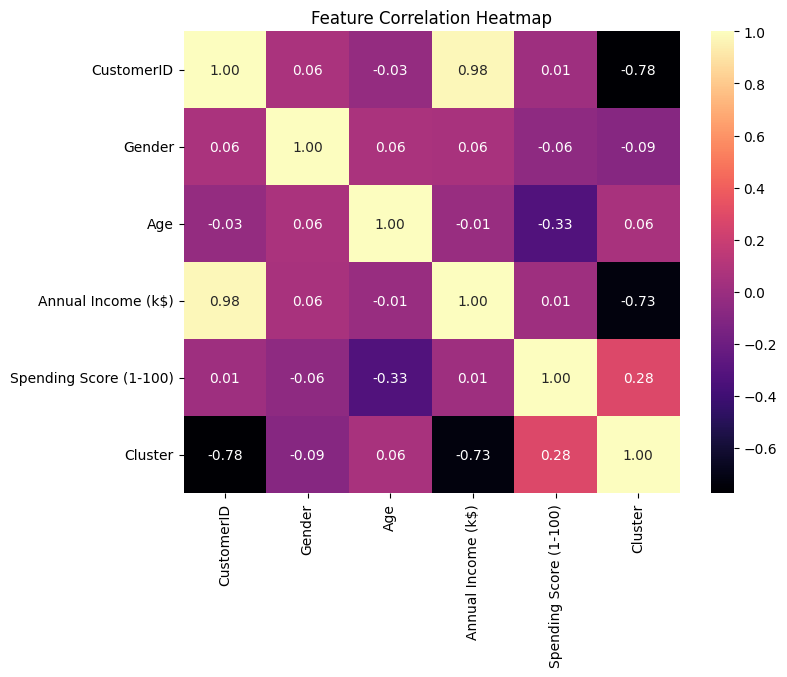

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Identify Groups:

Use K-Means clustering or hierarchical clustering to segment data.

In [ ]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Show cluster assignments
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0           -1.738999               -0.434801        2
1           -1.738999                1.195704        2
2           -1.700830               -1.715913        2
3           -1.700830                1.040418        2
4           -1.662660               -0.395980        2


Visualize clusters using scatter plots.

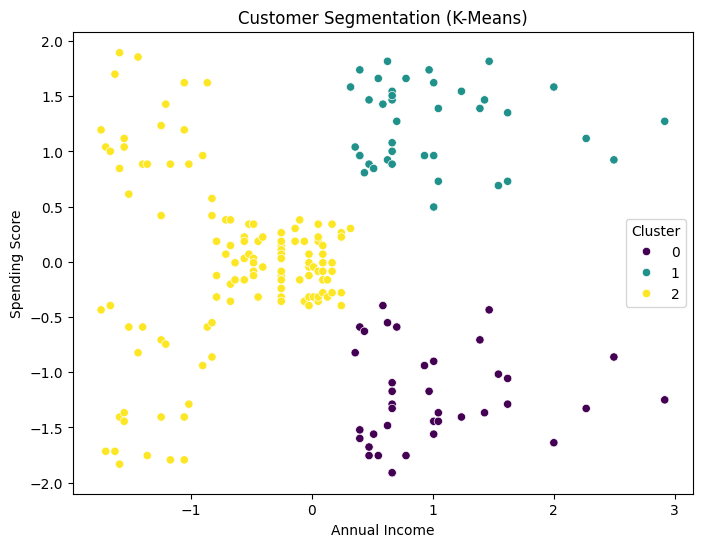

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette="viridis")
plt.title("Customer Segmentation (K-Means)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

Build a Model:

Use logistic regression, decision trees, or random forests to classify data.

In [ ]:
# Prepare data for classification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Cluster', 'CustomerID']), df['Cluster'], test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate model performance using accuracy, precision, and recall.

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        23

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
 [[12  0  0]
 [ 0  5  0]
 [ 0  0 23]]


Cluster
2    123
1     39
0     38
Name: count, dtype: int64

Cluster 0:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   38.000000  38.000000  38.000000           38.000000   
mean   162.000000   0.526316   0.110861            1.009200   
std     22.226111   0.506009   0.816485            0.621068   
min    125.000000   0.000000  -1.424569            0.360319   
25%    143.500000   0.000000  -0.348068            0.598878   
50%    162.000000   1.000000   0.190182            0.742014   
75%    180.500000   1.000000   0.584899            1.352725   
max    199.000000   1.000000   1.446099            2.917671   

       Spending Score (1-100)  Cluster  
count               38.000000     38.0  
mean                -1.225535      0.0  
std                  0.423774      0.0  
min                 -1.910021      0.0  
25%                 -1.550921      0.0  
50%                 -1.308287      0.0  
75%                 -0.910366      0.0  
max                 -0.395980  

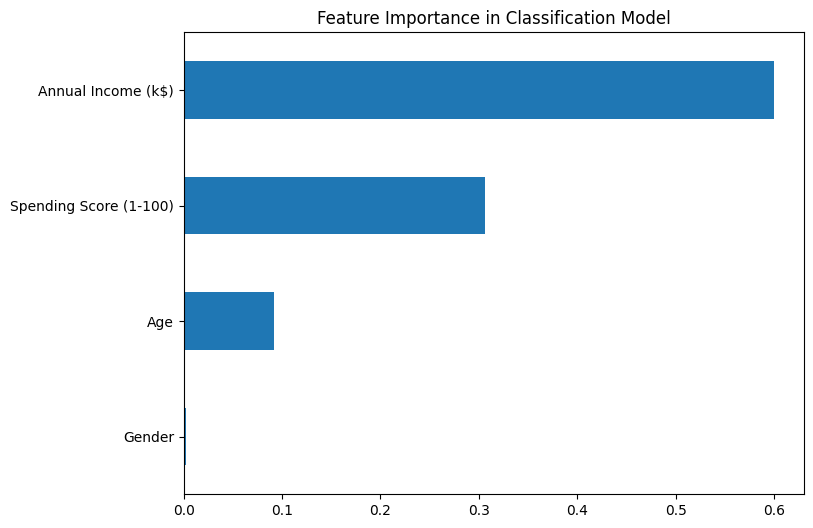

In [ ]:
# Display cluster distribution
print(df['Cluster'].value_counts())

# Insights: Analyze spending habits based on clusters
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())

# Plot feature importance (for Random Forest)
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance in Classification Model")
plt.show()

Interpret Results:

Analyze how well the model separates different groups.

**Accuracy & Performance Metrics:** If the model has high accuracy, it means the clusters are well-defined and the model can effectively classify customers. If accuracy is low, the separation between groups may not be strong enough.

**Confusion Matrix Analysis:** The confusion matrix helps identify which clusters are often misclassified. If two groups are frequently confused, they might have overlapping characteristics.

**Feature Importance:** Checking which features contribute most to classification helps understand if age, income, or spending score plays the biggest role in distinguishing groups. If important features are missing, the model may not perform well.

Discuss key insights gained from the clusters.

**Customer Behavior Patterns:** The clusters reveal how different types of customers behave, such as high-income big spenders, middle-income moderate spenders, or low-income budget-conscious shoppers.

**Marketing & Business Strategies:** Businesses can use the cluster insights to create personalized marketing campaigns, such as offering premium services to high spenders or discounts to price-sensitive customers.

**Improving Customer Experience:** By understanding customer preferences, businesses can provide better recommendations, improve loyalty programs, and design targeted offers to increase engagement and revenue.